**1. Apply Linear Regression to the provided dataset using underlying steps.**

In [129]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [130]:
# a. Import the given “Salary_Data.csv”

df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [131]:
# b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [132]:
# c. Train and predict the model. 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [133]:
# d. Calculate the mean_squared error

from sklearn.metrics import mean_squared_error

r=mean_squared_error(y_test,y_pred)
print(r)

21026037.329511303


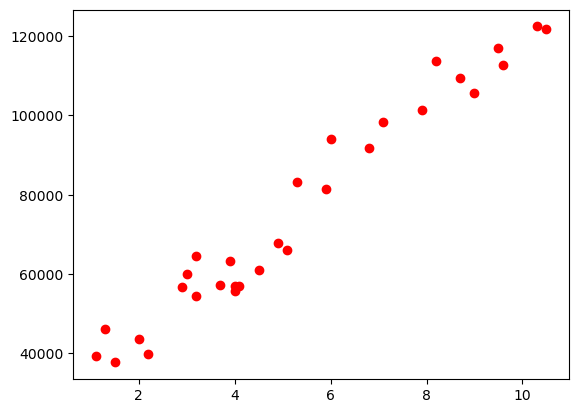

In [134]:
# e. Visualize both train and test data using scatter plot.

plt.scatter(x = df['YearsExperience'],y = df['Salary'],c='r')

**2. Apply K means clustering in the dataset provided:**

In [135]:
#Remove any null values by the mean.
X = df.iloc[:,1:].values

df.isna().sum()

df1=df.dropna()

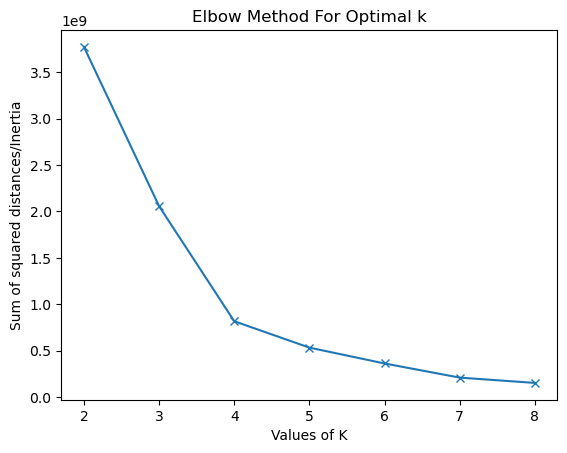

In [136]:
#Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,9)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'x-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

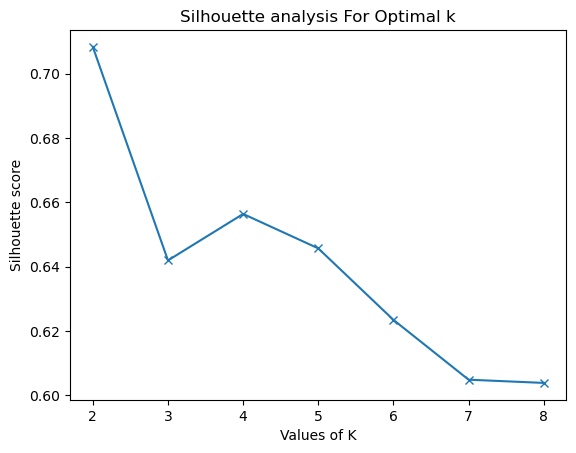

In [137]:
# Calculate the silhouette score for the above clustering

from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [138]:
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)


y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette score:',score)

Silhouette score: 0.6563763076264303


**3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
Yes, can you justify why**

In [139]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = df.columns[1:])

In [140]:
from sklearn.cluster import KMeans
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

y_scaled_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.6563763076264303
